# CA Data Preparation & Machine Learning 

# <span style='color:purple'> Preparing the dataset </span>

<b>Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid', as we it's possible to see in the dataset provided.</b>

    Goal of this project: Use classification or clustering algorithms to predict the bids in the future.

# Introduction

Online operations are very much part of our modern world. Your profile as a consumer defines what kind of markets will become your target as whatever you want to buy can easily be found in an online space. One of these online market concepts is called E-auctions, which have greatly facilitated the selling and acquisition of goods and services. E-auctions usually work with the sellers defining a starting price and you must bid against other buyers. According to the eBay Costumer Service (2022), you can keep track of your bidding and when the listing ends, the highest bidder wins the auction and pays for the item. It is important to remember that a bid is a binding contract. In order to monitor how the auctions work, we have a dataset available for the bidding of customers. In this dataset, we can see identifiers for auction and bidder, variables to prevent fraud, prices from the beginning to the end and ratios. There's also an important column which is going to be defined as a target: Class. This column is divided into 0 and 1: Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. Throughout this project, we are going to use classification algorithms to predict the class of the bids in the future. In doing so, we are going to follow guidelines for Data Preparation and Machine Learning modules with proper definitions and explanations.

# 1. Characterization of the dataset

First thing first, we must get the main libraries and load them into memory and then we can read the dataset provided.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
sns.set(color_codes=True) #color set
import sklearn.preprocessing as preproc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as seabornInstance
np.set_printoptions(precision=4)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

We then read out data and put it into a frame, already considering a list of missing value formats. In doing this, it is possible to check if our dataset has any corrupted values.

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",'nan','NaN']
df= pd.read_csv("data/ShillBiddingDataset.csv", na_values=missing_value_formats)

In [3]:
df.head(5)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Based on the list of missing value formats created above, we then have a look at the columns:

In [4]:
df.isna().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

No missing values were found, which means that there's no corrupted information in our dataset. Let's then see what information each column gives us and dig more into our data:

In [5]:
df.columns

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')

Each of these columns bring the information below:

- Record ID: Unique identifier of a record in the dataset.
- Auction ID: Unique identifier of an auction.
- Bidder ID: Unique identifier of a bidder.
- Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
- Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
- Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
- Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
- Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
- Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
- Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
- Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.
- Auction Duration: How long an auction lasted.
- Class: 0 for normal behaviour bidding; 1 for otherwise.

After getting our head around the description of each column, let's quantify it:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [7]:
df.shape

(6321, 13)

In [8]:
df.index

RangeIndex(start=0, stop=6321, step=1)

Based on these 3 pieces of information above, we can check that the main information from our dataset so far can be summarised this way:
- 13 columns, showing each particularity of a bid in an auction.
- 6321 rows, which are the biddings of customers
- 1 categorical variable (Bidder_ID)
- 12 numerical variables.

As a first view in our framed data, we have a string column called "Bidder ID". Looking at this column a bit closer, we can see that it refers to the identification of a bidder. It's possible to see the existence of bidders who participate more frequently like the "a * * * a", "n * * * t", "e * * * e", "i * * * a" and "r * * * r".

Note that the variable Bidding Ratio is linked to this particularity as it refers to a shill bidder who participates more frequently to raise the auction price and attract higher bids from legitimate participants

In [9]:
df["Bidder_ID"].value_counts()

a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
g***f      1
x***b      1
g***y      1
-***z      1
9***c      1
Name: Bidder_ID, Length: 1054, dtype: int64

Bidder ID can work as an identification for each operation in the dataset, but as it's confidential information (and for this reason has different characters), let's see if the column Record ID might work as a unique parameter for tracking each bidding transaction:

In [10]:
df["Record_ID"].is_unique

True

In [11]:
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


Possibility checked, but if we have another look at the framed data, it is possible to see that the numbers in the Record ID column don't really follow a sequence. Let's forget this idea and track each information by using our index column instead.

Let's have a look at our target column which is the column Class, divided into two classes: 0 and 1. As previously mentioned in our CA description, it is said that normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. There might be countless reasons for a bid becoming anomalous and no literature to track all possible abnormalities was found. However, according to the eBay Community(2018) on the  website it is possible to have an idea about what some bidders experienced as an abnormality, for example in regards to the "missed out on item".

Let's have a closer look at it:

In [12]:
df["Class"].value_counts()

0    5646
1     675
Name: Class, dtype: int64

We can see that 89% of our dataset consists of normal bids and 11% of anomalous bids. Based on these first visualizations, let's now see how our variables are linked statistically.

# 2. Statistics

"Python Descriptive Statistics process describes the basic features of data in a study. It delivers summaries on the sample and the measures." (Data Flair, 2022). This is an important step of our previous analysis, as we can clearly see the distribution of our data and how each variable correlates with one another.

In [13]:
df_des=df.describe().transpose()
df_des.head()

,count,mean,std,min,25%,50%,75%,max
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.0
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.0
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.0
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.0
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.0


Not only the main variables above, but the entire data can be examined. In doing so we can get a brief idea about its dispersion by asking "Is the 'mean' greater than the 'median? ':

In [14]:
df_des['Bool Mean'] = df_des['mean'].gt( df_des['50%'])#is the 'mean' greater than the MEDIAN?
df_des

,count,mean,std,min,25%,50%,75%,max,Bool Mean
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.000000,False
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000,False
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000,True
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000,True
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000,True
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900,True
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235,True
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935,True
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900,True
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000,True


At first glance, we can see that the identification (Record ID and Auction ID) and duration variables (Auction_Duration) have a standard different from the variable that gives us more detailed information about the bids. For these ones, they all follow a certain standard regarding scale

Finally let’s have a look at our correlations between variables through table and heatmap, which is very useful for finding the strength of the relationship:

In [15]:
df_corr= df.corr()
df_corr.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,1.000000,-0.003776,0.011075,-0.040123,0.005271,0.037588,0.048377,0.001265,0.031719,-0.057151,-0.012150,-0.003731
Auction_ID,-0.003776,1.000000,-0.006902,-0.021424,-0.003175,0.070341,0.097558,0.016182,0.068427,-0.039779,0.024918,-0.007985
Bidder_Tendency,0.011075,-0.006902,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,-0.040123,-0.021424,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.005271,-0.003175,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035


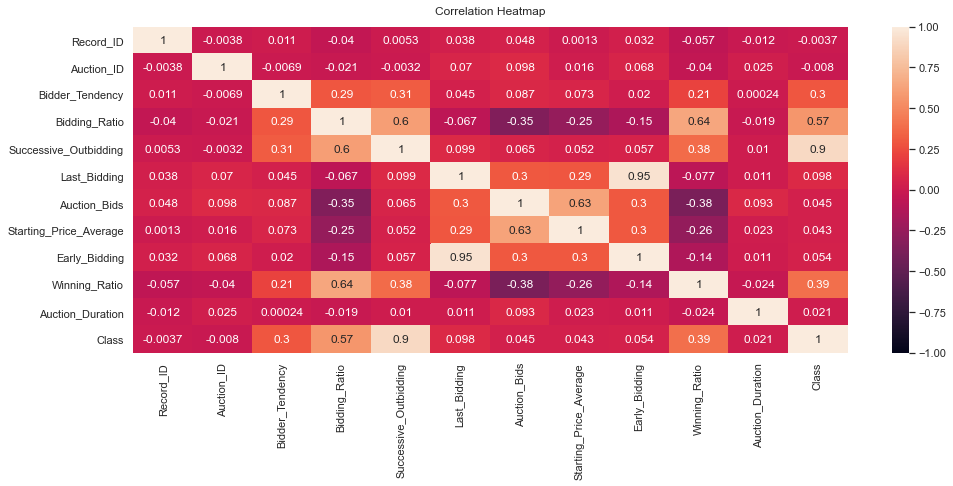

In [16]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In order to understand these values, correlation varies between -1 and +1:

* -1: perfect negative linear correlation

* +1:perfect positive linear correlation and

* 0: No correlation

As explained by Rumsey, D. (2021), the correlation coefficient r measures the strength and direction of a linear relationship between two variables. According to the result of it, we can then interpret this value dividing it into weak, moderate and strong linear relationships. 

From what we can see in the heatmap above, the variables below show a  <b> moderate correlation</b>:

1) Starting_Price_Average x Auction_Bids: according to the columns described in the previous section, we know that Auction_Bids considers auctions "in action" (when shill bidders activities are happening) and consequently, these are the times where a starting price is launched to attract legitimate bidders into the auction.

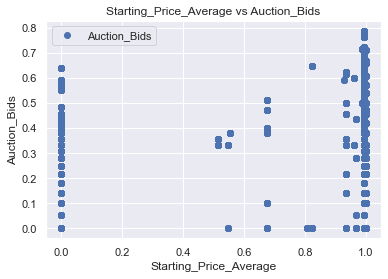

In [17]:
df.plot(x='Starting_Price_Average', y='Auction_Bids', style='o')
plt.title('Starting_Price_Average vs Auction_Bids')
plt.xlabel('Starting_Price_Average')
plt.ylabel('Auction_Bids')
plt.show()

2) Winning_Ratio x Bidding_Ratio: Winning_Ratio refers to a shill bidder who competes in many auctions but hardly wins any auctions whereas a Bidding_Ratio refers to a shill bidder who participates more frequently to raise the auction price and attract higher bids from legitimate participants.

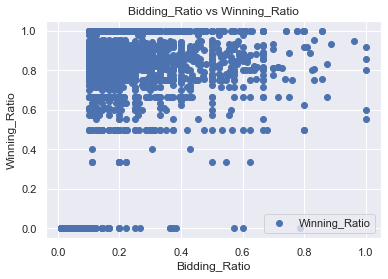

In [18]:
df.plot(x='Bidding_Ratio', y='Winning_Ratio', style='o')
plt.title('Bidding_Ratio vs Winning_Ratio')
plt.xlabel('Bidding_Ratio')
plt.ylabel('Winning_Ratio')
plt.show()

3) Successive_Outbidding x Bidding_Ratio: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments, so that this concept clearly affects the participation of this bidder

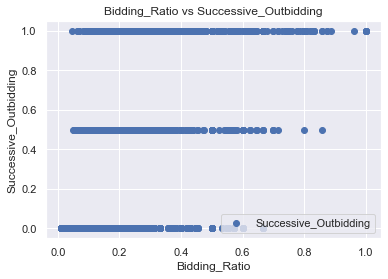

In [19]:
df.plot(x='Bidding_Ratio', y='Successive_Outbidding', style='o')
plt.title('Bidding_Ratio vs Successive_Outbidding')
plt.xlabel('Bidding_Ratio')
plt.ylabel('Successive_Outbidding')
plt.show()

These other variables below show a <b> strong correlation</b>:

1) Early_Bidding x Last_Bidding: Early bids work to get the attention of auction users and can be related to bidders who become inactive at the last stage of the auction to avoid winning the auction

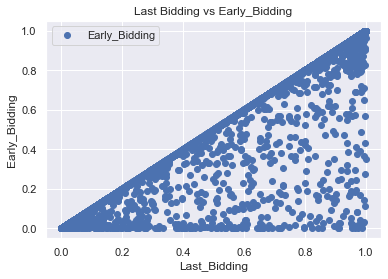

In [20]:
df.plot(x='Last_Bidding', y='Early_Bidding', style='o')
plt.title('Last Bidding vs Early_Bidding')
plt.xlabel('Last_Bidding')
plt.ylabel('Early_Bidding')
plt.show()

2) Successive_Outbidding x Class: normal and abnormal bids can be correlated to the frequency of Outbidding. From what we see in the cross table above, the more the ratio for Successive_Outbidding, the more anomalous the bid is.

In [21]:
pd.crosstab(df["Class"], df["Successive_Outbidding"])

Successive_Outbidding,0.0,0.5,1.0
Class,,,
0,5476,152,18
1,2,222,451


Concerning our target variable Class, besides the strong correlation with the variable Successive_Outbidding, we also have:

- Class x Winning_Ratio - <b>moderate correlation</b>: a considerable number of bids classified as normal have zero Winning_Ratio.

In [22]:
pd.crosstab(df["Winning_Ratio"], df["Class"])

Class,0,1
Winning_Ratio,,
0.000000,3636,4
0.333333,10,2
0.400000,3,0
0.500000,43,19
0.555556,7,2
...,...,...
0.947368,8,3
0.950000,4,1
0.954545,8,4


- Class x Bidding_Ratio - <b>moderate correlation</b>: Apparently, the bigger the Bidding_Ratio, the higher the chances of an anomalous bid.

In [23]:
pd.crosstab(df["Bidding_Ratio"], df["Class"])

Class,0,1
Bidding_Ratio,,
0.011765,29,0
0.012658,6,0
0.013158,7,0
0.015385,12,0
0.015873,18,0
...,...,...
0.857143,1,2
0.875000,0,2
0.886364,0,1


That's the mathematical impression of our data so far. Let's call the frame again in order to keep in mind the disposal of our data and move to the visualization step.

In [24]:
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


## <b>3. Visualizing the dataset</b>

"A pairplot plots pairwise relationships in a dataset. The pairplot function creates a grid of Axes so that each variable in the data will by shared in the y-axis across a single row and in the x-axis across a single column". Python Tutorial (2021). This function creates plots as shown below, with our most correlated variables:

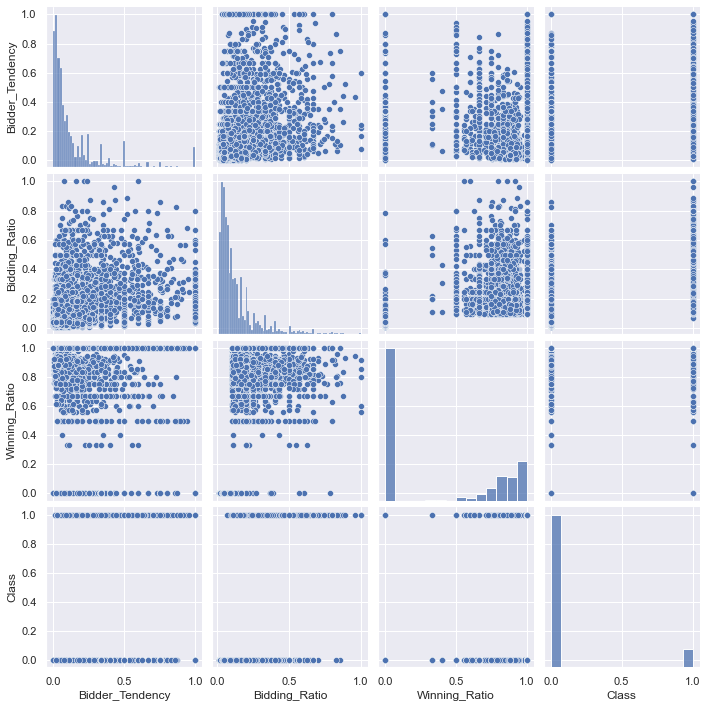

In [25]:
g=sns.pairplot(df, vars=['Bidder_Tendency','Bidding_Ratio','Winning_Ratio', 'Class'])

Another good way to visualize our data is by using the seaborn.boxplot. "The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. (Waskon, M. 2021)".

<AxesSubplot:>

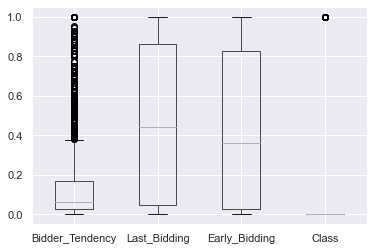

In [26]:
df.boxplot(column=['Bidder_Tendency','Last_Bidding','Early_Bidding','Class'])

Based on that, we can see that the variable Bidder_Tendency gives us a good amount of information that can be interpreted as outliers. Whereas Last_Bidding and Early_Bidding doesn’t. Regarding the variable Class, it's binary so we can't really conclude anything so far.

Having completed a statistical analysis in the previous topic, we can now extend it by looking at a histogram, which is a great tool for quickly assessing a probability distribution in the data:

<Figure size 432x288 with 0 Axes>

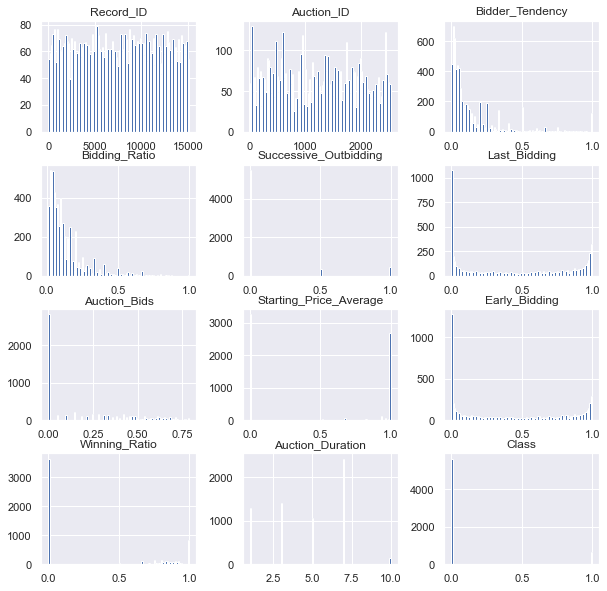

In [27]:
plt.figure()
df.hist(bins= 100,figsize = (10,10))
plt.show()

We can see that none of our variables follows a normal distribution and confirm it by having a closer look at the main ones:

<AxesSubplot:>

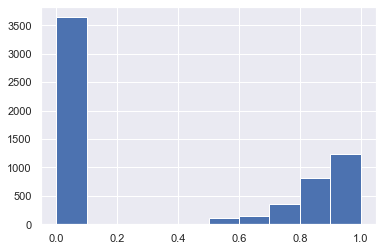

In [28]:
df['Winning_Ratio'].hist()

<AxesSubplot:>

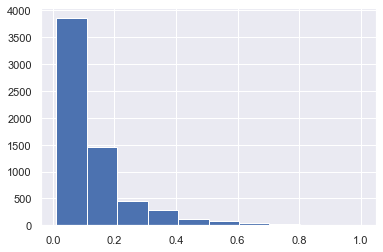

In [29]:
df['Bidding_Ratio'].hist()

<AxesSubplot:>

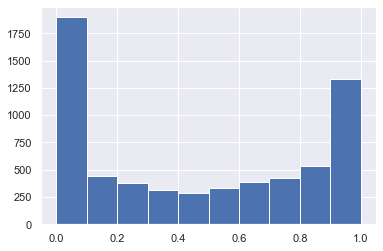

In [30]:
df['Last_Bidding'].hist()

<AxesSubplot:>

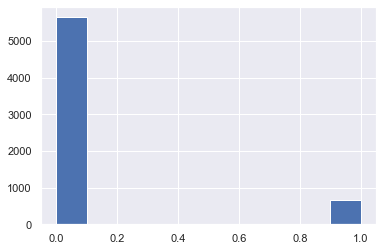

In [31]:
df['Class'].hist()

Finally, yet importantly, we can see graphically how our target variable behaves in relation to its frequency in the data:

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Frequency')]

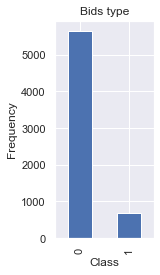

In [32]:
plt.subplot(1,3,1)
plt1 = df.Class.value_counts().plot.bar()
plt.title('Bids type')
plt1.set(xlabel = 'Class', ylabel='Frequency')

<b>3.1 Relationship between the dataset</b>

As a complement to our statistical analysis in the previous section, let's see the relationship of some variables:

Visually, we can see the majority of Last_Bidding are anomalous which is probably related to fraud, if we consider the previous definition of the variable "Last_Bidding".

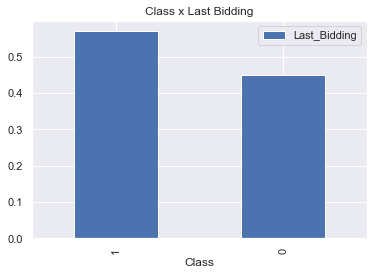

In [33]:
df_id=pd.DataFrame(df.groupby(['Class'])['Last_Bidding'].mean().sort_values(ascending = False)[:30])
df_id.plot.bar()
plt.title('Class x Last Bidding')
plt.show()   

One of the highest coefficients of correlation can now be seen on a bar plot:

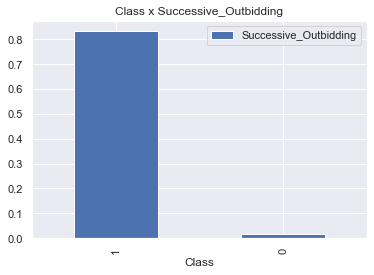

In [34]:
df_class=pd.DataFrame(df.groupby(['Class'])['Successive_Outbidding'].mean().sort_values(ascending = False)[:30])
df_class.plot.bar()
plt.title('Class x Successive_Outbidding')
plt.show() 

Note that mostly anomalous bids have a higher input of Successive_Outbiding. To refresh our memory about the concept of Successive_Outbiding, it's simply the bidder bidding again on his last bid, in order to increase the price gradually with small consecutive increments. This is possibly another warning for anomalies related to fraud.

Let's then see how our target variable is divided in a pie plot:

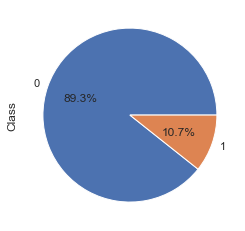

In [35]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

# 4. Outliers

Some of the visualisations created so far have shown us the existence of potential outliers in our data. According to Sharma, N. (2018), an outlier is something which is separate/different from the crowd. In other words, it is a point in the data that is distant from the other points. Based on the definition and library provided, let's detect our outliers:

<b>4 Detecting outliers</b>

In [36]:
print('Any data point that lies below the lower bound and above the upper bound is considered as an Outlier.')
df_des['Hight Outliers'] =  df_des['75%'] + (1.5 *(df_des['75%'] - df_des['25%']))
df_des['Low Outliers'] = df_des['25%'] - (1.5 *(df_des['75%'] - df_des['25%']))
df_des.head()

Any data point that lies below the lower bound and above the upper bound is considered as an Outlier.


,count,mean,std,min,25%,50%,75%,max,Bool Mean,Hight Outliers,Low Outliers
Record_ID,6321.0,7535.829457,4364.759137,1.000000,3778.000000,7591.000000,11277.000000,15144.0,False,22525.500000,-7470.500000
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.0,False,3784.000000,-1328.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.0,True,0.376126,-0.182432
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.0,True,0.351449,-0.141304
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.0,True,0.000000,0.000000


We can see that our data has positive and negative values and some of these extremes are worth paying attention to. Let's see how the outliers are disposed in our main variables:

<AxesSubplot:xlabel='Bidder_Tendency'>

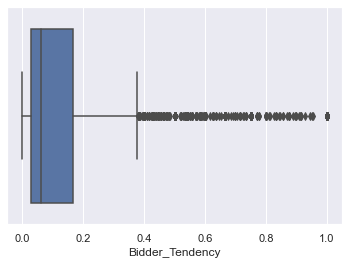

In [37]:
sns.boxplot(x=df['Bidder_Tendency'])

When a shill bidder participates exclusively in auctions of few sellers rather than a diversified one, it can be monitored by the variable Bidder_Tendency. As we obviously expect the process to keep going as usual, values in our data for Bidder_Tendency refer to the times in which it happened. Because of that, are they natural or non-natural outliers? We are going to get into this definition soon. Let's have a look at the outliers for the variable Bidding_Ratio:

<AxesSubplot:xlabel='Bidding_Ratio'>

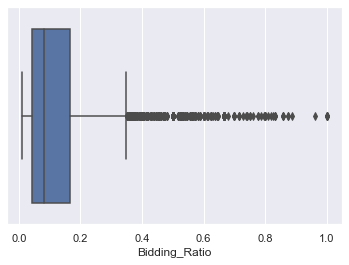

In [38]:
sns.boxplot(x=df['Bidding_Ratio'])

For the Bidding Ratio we have similar behavior for the Bidder_Tendency.

Regarding the variable Last_Bidding, there's no outliers:

<AxesSubplot:xlabel='Last_Bidding'>

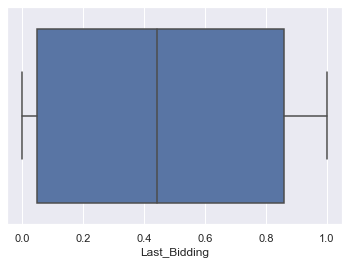

In [39]:
sns.boxplot(x=df['Last_Bidding'])

Same for Starting_Price_Average:

<AxesSubplot:xlabel='Starting_Price_Average'>

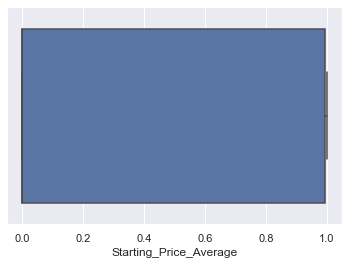

In [40]:
sns.boxplot(x=df['Starting_Price_Average'])

When it comes to the variable Class, the boxplot is not really useful as Class is a variable divided into 0 and 1:

<AxesSubplot:xlabel='Class'>

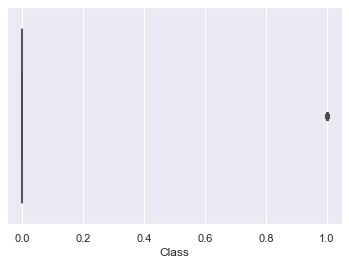

In [41]:
sns.boxplot(x=df['Class'])

In [42]:
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


# 5. Manipulation of the dataset

After all the analysis performed so far, considering correlation, relationship between the data and outliers, let's now clean up out data in order to have it prepared for the next intense steps of performing a machine learning model.

<b>5.1 Dropping columns</b>

We have already seen that identification columns can be useful for tracking a bid but not really useful for analysing correlated points in the data. Before we focus on this, what about the duration of the auction? Let's see what this variable can show us in relation to the target variable:

In [43]:
pd.crosstab(df["Class"], df["Auction_Duration"])

Auction_Duration,1,3,5,7,10
Class,,,,,
0,1135,1303,975,2098,135
1,154,105,85,329,2


Anomalies are not directly linked to the duration of the auction. Besides, because the scale of this variable is quite high in comparison to the other variables, we can come to the conclusion that this is not a key variable in our data. Let's then drop the identification columns as mentioned before and the duration one:

In [44]:
df=df.drop(["Bidder_ID","Auction_ID","Auction_Duration","Record_ID"], axis=1)

That's the new look of our data now:

In [45]:
df

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,0


<b>5.2 Treating outliers</b>

Back to the difference between natural and non-natural mentioned in the previous section, according to Goyal,C.(2021), the non-natural outliers are those which are caused by measurement errors, wrong data collection, or wrong data entry whereas natural outliers could be the use case of fraudulent transactions in banking data, etc. Based on this, we can reflect that not all outliers are the same and each data has to be analysed considering its particularities.

In regards to our dataset, the Interquartile Rule was used to find and trim outliers. According to Courtney,T.(2020), the interquartile range is done using these steps:

- Calculate the interquartile range for the data.
- Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
- Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
- Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

In python, it works like this:
- Q1 = df.quantile(0.25)
- Q3 = df.quantile(0.75)
- IQR = Q3 - Q1

- df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

When running the python code above for the interquartile rule, all the information classified as an anomaly in our target variable were deleted. From this we can conclude that sometimes outliers indicate a mistake in data collection. Other times, though, they can influence a dataset, so it’s important to keep them to better understand the dataset in the big picture.

This is then the final shape of our data after the performed cleaning:

In [46]:
df.shape

(6321, 9)

# 6. Splitting the data

In order to perfom the next steps of our analysis, let's divide our data into 2 groups:
- X: variables of all data without the target variable Class
- y: target variable Class

This is an important step to perform in our data is the dimensionality reduction technique.

In [47]:
# Create x (features matrix)
X=df.drop("Class", axis=1)
# Create y (labels)
y=df["Class"] 

That's then the shape of both groups:

In [48]:
X.shape

(6321, 8)

In [49]:
y.shape

(6321,)

# 7. Dimensionality Reduction

As said by Brownlee, J. (2020), "The number of input variables or features for a dataset is referred to as its dimensionality. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality".
In other words, large numbers of input features can cause poor performance for machine learning algorithms.

That being said, both LDA and PCA work as a dimensionality reduction technique, which means that we use the technique to reduce the amount of variables in our dataset.

Initially, we had 12 variables that were dropped for 9 after cleaning. 
For interpretation, we now have 8 variables and 1 target (column Class) and our goal is to predict the target variable based on all the other 8.
To do that, we use an algorithm that works by indentifying variables that carry the most relevant information of the data according to the target variable.
Let's then compare two of these techniques: PCA and LDA.

# <span style='color:purple'> LDA </span>

Linear discriminant analysis, also known as LDA, is one of the dimensionality reduction techniques used to find a linear combination of features that separates two or more classes. That separation happens by computing the directions (“linear discriminants”) which represent the axis that enhances the separation between multiple classes. (Great Learning, 2020).

The goal of LDA is to discriminate different classes in low dimensional space by retaining the components containing feature values that have the best separation across classes. 

Let's use the predefined LinearDiscriminantAnalysis class made available to us by the scikit-learn library:

In [50]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

We then get the variance explained by each component:

In [51]:
lda.explained_variance_ratio_

array([1.])

In [52]:
lda.classes_

array([0, 1])

As we can see by performing LDA, only 1 dimension is due to be analysed with our target variable Class, covering 100% of total variance.
Let's get an idea about how it works with our target variable:

In [53]:
df_lda=pd.DataFrame(X_lda)
df_lda.columns=['LDA']
df_lda['Class']=y
df_lda.head(3)

,LDA,Class
0,-0.726925,0
1,-0.657406,0
2,-0.628291,0


The amount of components got as a result of the LDA is impressive. But let's now visualize how this information is separated in the data.

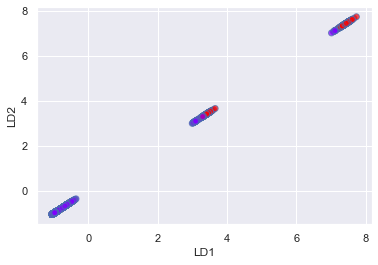

In [54]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
X_lda[:,0],
X_lda[:,0],
c=y,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)

In the above plot we can see the separation between the two classes (Normal and Anomalous).  This shows that LDA has done its job: class got linearly separated and, in this case, in only one component.

In [55]:
np.var(X_lda)

5.410630870132972

LDA is different from PCA. Linear Discriminant Analysis finds the area that maximizes the separation between multiple classes. That is not done in PCA.

# <span style='color:purple'> PCA </span>

Principal component analysis is also one of the methods of Dimensionality reduction.

The goal of PCA is to reduce the original high dimensional data to low dimensional space, without losing much vital information. Then features (dimensions) with the largest variance within classes are kept. Redundant and correlated features are dropped. 

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

In [56]:
pca=PCA().fit(X)
pca.n_components_

8

We want to see how many components is needed to get 100% of the information involved. Remember: the dropped data has 8 components. According to the result above and the graph below, we still need the same 8 components. 

Text(0, 0.5, 'Cumulative Explained Variance')

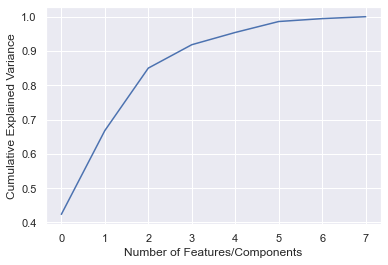

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features/Components")
plt.ylabel("Cumulative Explained Variance")

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 42.34% of the variance, the second principal component contains 24.43%, the third one 18,23% of the variance and so on.

In [58]:
print(pca.explained_variance_ratio_)

[0.4234 0.2443 0.1823 0.0682 0.0358 0.0319 0.0085 0.0056]


Together, the first and the second components contain 67%% of the information. Let's then analyse only these 2 for the moment:

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [60]:
pca.explained_variance_ratio_

array([0.4234, 0.2443])

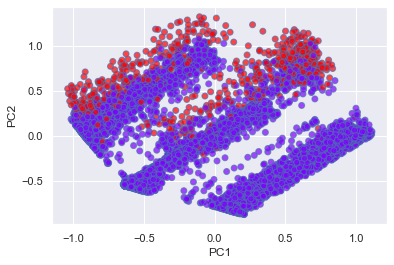

In [61]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

As we can see, PCA selected the components which would result in the highest spread (retain the most information) and not necessarily the ones which maximize the separation between classes.

In [62]:
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca .shape)))

Original shape: (6321, 8)
Reduced shape: (6321, 2)


In [63]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])

In [64]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
finalDf

,principal component 1,principal component 2,Class
0,-0.270160,-0.271914,0
1,-0.335166,-0.125779,0
2,-0.362721,-0.086893,0
3,-0.276631,-0.006901,0
4,-0.815908,-0.202437,0
...,...,...,...
6316,0.390182,0.731365,1
6317,-0.256065,-0.214113,0
6318,0.057701,-0.788807,0
6319,0.070911,-0.761924,0


<b> 7.1 Deployment

In a nutshell, finding something in a smaller dimension is relatively easy in comparison to doing the same in a higher dimension. This could be understood with the help of the phenomenon called “The curse of dimensionality”.
Dimensionality reduction helps compress the data without losing much of the signal and combats the curse while also economizing on memore.

PCA is known as Unsupervised but LDA is supervised because of the relation to the dependent variable.

In regards to our data, simply put, working on 1 component is less complex than working with more than 2, 3 or 8.

# 8. Machine Learning approach

Johnson, D.(2021) explains in his article that the key difference between Supervised vs Unsupervised Learning is that for the first, you train the machine using data which is well “labeled.” It means some data is already tagged with the correct answer, whereas for the second one, you do not need to supervise the model. Instead, you need to allow the model to work on its own to discover information. It mainly deals with the unlabelled data.

Based on that, our dataset is labelled and our target variable has two classes.

Supervised learning is classified into two categories of algorithms: 
- Classification: A classification problem is when the output variable is a category, such as “Red” or “blue” or "Normal" and "Anomalous".
- Regression: A regression problem is when the output variable is a real value, such as “euro” or “weight”.

Also based on that, we can conclude that we have a classification analysis.

# 9. Splitting our data into train and test sets

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model Brownlee, Jason (2020).
Due to the size of our data, it’s possible to split the dataset into train and test datasets and each of the train and test datasets are suitable representations of the problem domain, which means that one part of the data is used to develop a predictive model and the other to evaluate the model's performance.
The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.
We then split our dataset into input (X) and output (y) columns, then call the function passing both arrays and have them split appropriately into train and test subsets.

In [65]:
#setup random seed
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5056, 8), (1265, 8), (5056,), (1265,))

One benefit of splitting a dataset into some ratio of training and testing subsets is that it prevents 'overfitting', a problem where the model has become too finely tuned to the data it’s been given so that it is unable to create accurate predictions on data it hasn't been trained on.
Since our data is now in training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions on the test data.

# 10. Chossing the right estimator/ algorithm for our problem.

Knowing that our machine learning approach is supervised, the main difference between Regression and Classification algorithms is that Regression algorithms are used to predict the continuous values such as price, salary, age, etc. and Classification algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Normal and Anomalous etc.
Let's check which classification algorithms are the best to perform in our analysis:

In [66]:
# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Without manually setting the random state using the random_state parameter of some models or using a NumPy random seed, every time you run the cell, you'll get slightly different results.

Let's see this in effect by running the same code as the cell above, except this time setting a NumPy random seed equal to 42.

In [67]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

{'LinearSVC': 0.9731225296442688,
 'KNN': 0.9786561264822135,
 'SVC': 0.9786561264822135,
 'LogisticRegression': 0.9691699604743083,
 'RandomForestClassifier': 0.9778656126482214}

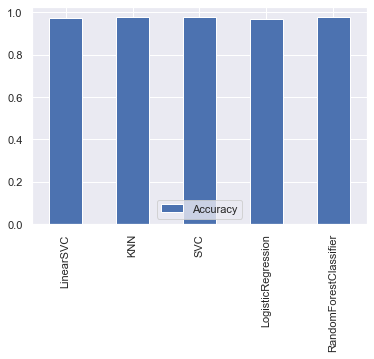

In [68]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

From the result above and the graph we can see that the models have quite similar scores. But for this particular analysis, we are going to work with Random Forest Classifier and Linear CSV.

# 11. Trying the models

# <span style='color:purple'> Random Forest Classifier </span>

In order to understand how this model works, we have to remember insights about the learning decision tree from data. 
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

<b> Hyperparameter Tuning

A hyperparameter is a parameter that is set before the learning process begins. These parameters are tunable and can directly affect how well a model runs through the training cycle.
Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations for evaluating the performance of each model. However, evaluating each model only on the training set can lead to one of the most fundamental problems in machine learning: overfitting.

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()

# We'll keep the default hyperparameters
clf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In regards to our model, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). Let's test which one is better to work with for the moment:

In [70]:
#grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [71]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [72]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980594 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.978116 (0.005018) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.980172 (0.005063) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.980594 (0.005612) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.978168 (0.005424) with: {'max_features': 'log2', 'n_estimators': 10}
0.979540 (0.005537) with: {'max_features': 'log2', 'n_estimators': 100}
0.980119 (0.005351) with: {'max_features': 'log2', 'n_estimators': 1000}


As mentioned before, an important parameter for random forest is the number of trees (n_estimators). Good values might be a log scale from 10 to 1,000.
Based on the test performed above, let's use the n_estimators: 100.

<b> Preparing the model and fitting the data

In [73]:
# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [74]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,1109,24
1,3,129


<b> Evaluating the model

Evaluating predictions is as important making them. Let's check how our model did by calling the 'score()' method on it and passing it the training (X_train, y_train) and testing data.

In [75]:
# Evaluate the Random Forest Classifier
clf.score(X_test, y_test) 

0.9786561264822135

In [76]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

With the sklearn.metrics, we can predict how accurately the model or classifier can predict if the bit is normal or anomalous. So we will calculate the accuracy score, recall, and precision for our evaluation.

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1133
           1       0.84      0.98      0.91       132

    accuracy                           0.98      1265
   macro avg       0.92      0.98      0.95      1265
weighted avg       0.98      0.98      0.98      1265



Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

In [78]:
confusion_matrix(y_test, y_preds)

array([[1109,   24],
       [   3,  129]])

In [79]:
accuracy_score(y_test, y_preds)

0.9786561264822135

We then see how often is the classifier correct: 0.97. We can then visualize this prediction in a frame:

In [80]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
4083,0,0,0
3844,0,0,0
712,0,1,1
3649,0,0,0
2873,0,0,0
156,0,0,0
4914,0,0,0
4536,0,0,0
5022,0,0,0
5621,0,0,0


<b> Model Evaluation

We've tried to find the best hyperparameters on our model using n_estimators=100 and so far we've only been evaluating our model using the score() function which returns accuracy. 
A more robust way to evaluate metrics is to calculate them using cross-validation.

In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
Let's see how it works:

In [81]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [82]:
# By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.9794, 0.9794, 0.981 , 0.9818, 0.9755])

We can also perform cross-validation on the mean and on the other metrics:

In [83]:
# Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.9788008455496072

In [84]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8647582596533047

In [85]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

0.9377777777777778

In [86]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.9043636159936446

# <span style='color:purple'> Linear SVC </span>

"The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is". Harrison,P.(2021).

<b> Hyperparameter Tuning

In [87]:
from sklearn.svm import LinearSVC
clf2 = LinearSVC()

# We'll keep the default hyperparameters
clf2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [88]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model=LinearSVC()
max_iter = [10, 100, 1000]
C = [50, 10, 1.0, 0.1, 0.01]

In [89]:
# define grid search
grid = dict(max_iter=max_iter, C=C)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [90]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977747 using {'C': 1.0, 'max_iter': 100}
0.968361 (0.017597) with: {'C': 50, 'max_iter': 10}
0.976481 (0.005685) with: {'C': 50, 'max_iter': 100}
0.977325 (0.006873) with: {'C': 50, 'max_iter': 1000}
0.974318 (0.008816) with: {'C': 10, 'max_iter': 10}
0.977325 (0.006060) with: {'C': 10, 'max_iter': 100}
0.977536 (0.006048) with: {'C': 10, 'max_iter': 1000}
0.976481 (0.006347) with: {'C': 1.0, 'max_iter': 10}
0.977747 (0.006110) with: {'C': 1.0, 'max_iter': 100}
0.977747 (0.006110) with: {'C': 1.0, 'max_iter': 1000}
0.975585 (0.005784) with: {'C': 0.1, 'max_iter': 10}
0.975585 (0.005784) with: {'C': 0.1, 'max_iter': 100}
0.975585 (0.005784) with: {'C': 0.1, 'max_iter': 1000}
0.964879 (0.005092) with: {'C': 0.01, 'max_iter': 10}
0.964879 (0.005092) with: {'C': 0.01, 'max_iter': 100}
0.964879 (0.005092) with: {'C': 0.01, 'max_iter': 1000}


<b> Preparing the model and fitting the data

In [91]:
#Instatiate and fit the model (on the training set)
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [92]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,1106,27
1,7,125


<b> Evaluating the model

In [93]:
# Evaluate the LinearSVC
clf.score(X_test, y_test) #look up what that score means

0.9731225296442688

In [94]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

0.9790348101265823

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1133
           1       0.82      0.95      0.88       132

    accuracy                           0.97      1265
   macro avg       0.91      0.96      0.93      1265
weighted avg       0.98      0.97      0.97      1265



In [96]:
confusion_matrix(y_test, y_preds)

array([[1106,   27],
       [   7,  125]])

In [97]:
accuracy_score(y_test, y_preds)

0.9731225296442688

In [98]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
4083,0,0,0
3844,0,0,0
712,0,1,1
3649,0,0,0
2873,0,0,0
156,0,0,0
4914,0,0,0
4536,0,0,0
5022,0,0,0
5621,0,0,0


<b> Model Evaluation

An overfit model may look impressive on the training set, but will be useless in a real application. Therefore, the standard procedure for hyperparameter optimization accounts for overfitting through cross validation.

We've tried to find the best hyperparameters on our model using max_iter=10000 and so far we've only been evaluating our model using the score() function which returns accuracy. 
A more robust way to evaluate metrics is to calculate them using cross-validation.

In [99]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [100]:
# EXAMPLE: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.981 , 0.9802, 0.9755, 0.9739, 0.9771])

In [101]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.9775346475208885

Now it's time to find the same for precision, recall and F1 score.

In [102]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8598114200210366

In [103]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

0.9437037037037037

In [104]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.8996920160984565

# Trying one of the models with LDA

After performing and comparing two models according to our X and y splitted data, let's try one of the models with our performed LDA data.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [106]:
# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [107]:
# Evaluate the Random Forest Classifier
clf.score(X_test, y_test) 

0.9835547122074636

In [108]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [109]:
confusion_matrix(y_test, y_preds)

array([[1401,   16],
       [  10,  154]])

In [110]:
accuracy_score(y_test, y_preds)

0.9835547122074636

In [111]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1417
           1       0.91      0.94      0.92       164

    accuracy                           0.98      1581
   macro avg       0.95      0.96      0.96      1581
weighted avg       0.98      0.98      0.98      1581



In [112]:
# Evaluation: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.9779, 0.9771, 0.9794, 0.981 , 0.9739])

# Conclusion

We can then summarize the results in the tables above.

Table 1: Random Forest Classifier

<table>
 <tr>
     <th colspan="2">Summary Table</th>
  </tr> 
  <tr>
    <th>Dafaframes</th>  
    <th>df - initial </th>
    <th>df - manipulated </th>
  </tr>
  <tr>
    <th>shape(Rows, Columns)</th>
    <td>(6391, 13)</td>   
    <td>(6321, 9)</td>
  </tr>
  <tr>
    <th>Dimensionality Result</th>
    <th>LDA </th>
    <th>PCA </th>
  </tr>
  <tr>
    <th>Array Result</th>
    <td>array([1.])</td>
    <td>array([0.4234, 0.2443])</td>
  </tr>  
  <tr>
    <th>Training splits</th>
    <th>X: Class droped</th>   
    <th>y: Class column</th>
  </tr>   
  <tr>
    <th>shape(Rows, Columns)</th>
    <td>X_Train(5056, 8), X_Test(1265, 9)</td>
    <td>y_Train(5056), y_Test(1265)</td>   
  </tr>
   <tr>
    <th> Random Forest Classifier: </th>
    <td> clf Test= 0.9786, clf Train=1 </td>   
    <td> Accuracy=0.9788  </td>      
  </tr>  
  <tr>
    <th>Metrics</th>
    <th>0</th>   
    <th>1</th>
    </tr>   
  <tr>
    <th>Precision</th>
    <td>1.00</td>
    <td>0.84</td>  
     </tr>   
  <tr>
    <th>Recall</th>
    <td>0.98</td>
    <td>0.98</td> 
    </tr>   
  <tr>
    <th>F1</th>
    <td>0.99</td>
    <td>0.91</td> 
      </tr>   
  <tr>
    <th>Support</th>
    <td>1133</td>
    <td>132</td> 
</table>

Cross-validation for Random Forest Classifier:

<table>
 <tr>
    <th>Cross-Validation</th>
    <th>df Random Forest Classifier</th>
  </tr>
     <tr>
    <th>5 scores</th>
    <td>array([0.9794, 0.9794, 0.981 , 0.9818, 0.9755])</td>   
   </tr>
     <tr>
    <th>Mean</th>
    <td>0.9788</td>
    </tr>
     <tr>
    <th>Precision</th>
    <td>0.8647</td>
    </tr>
     <tr>
    <th>Recall</th>
    <td>0.9377</td>
      </tr>
     <tr>
    <th>F1</th>
    <td>0.9043</td>
         
</table>

Table 2: Linear SVC

<table>
 <tr>
     <th colspan="2">Summary Table</th>
  </tr> 
  <tr>
    <th>Dafaframes</th>  
    <th>df - initial </th>
    <th>df - manipulated </th>
  </tr>
  <tr>
    <th>shape(Rows, Columns)</th>
    <td>(6391, 13)</td>   
    <td>(6321, 9)</td>
  </tr>
  <tr>
    <th>Dimensionality Result</th>
    <th>LDA </th>
    <th>PCA </th>
  </tr>
  <tr>
    <th>Array Result</th>
    <td>array([1.])</td>
    <td>array([0.4234, 0.2443])</td>
  </tr>  
  <tr>
    <th>Training splits</th>
    <th>X: Class droped</th>   
    <th>y: Class column</th>
  </tr>   
  <tr>
    <th>shape(Rows, Columns)</th>
    <td>X_Train(5056, 8), X_Test(1265, 9)</td>
    <td>y_Train(5056), y_Test(1265)</td>   
  </tr>
   <tr>
    <th> Linear SVC: </th>
    <td> clf Test= 0.9731, clf Train=0.9790 </td>   
    <td> Accuracy=0.9731  </td>      
  </tr>  
  <tr>
    <th>Metrics</th>
    <th>0</th>   
    <th>1</th>
    </tr>   
  <tr>
    <th>Precision</th>
    <td>0.99</td>
    <td>0.82</td>  
     </tr>   
  <tr>
    <th>Recall</th>
    <td>0.98</td>
    <td>0.95</td> 
    </tr>   
  <tr>
    <th>F1</th>
    <td>0.98</td>
    <td>0.88</td> 
      </tr>   
  <tr>
    <th>Support</th>
    <td>1133</td>
    <td>132</td> 
</table>

Cross-validation for Linear SVC

<table>
 <tr>
    <th>Cross-Validation</th>
    <th>df Linear SVC</th>
  </tr>
     <tr>
    <th>5 scores</th>
    <td>array([0.981 , 0.9802, 0.9755, 0.9739, 0.9771])</td>   
   </tr>
     <tr>
    <th>Mean</th>
    <td>0.9775</td>
    </tr>
     <tr>
    <th>Precision</th>
    <td>0.8598</td>
    </tr>
     <tr>
    <th>Recall</th>
    <td>0.9437</td>
      </tr>
     <tr>
    <th>F1</th>
    <td>0.8996</td>
         
</table>

Random Forest Classifiers performed with LDA:

<table>
 <tr>
     <th colspan="2">Summary Table</th>
  </tr> 
  <tr> 
  </tr>
   <tr>
    <th> Random Forest Classifier/ LDA: </th>
    <td> clf Test= 0.9835, clf Train=1 </td>   
    <td> Accuracy=0.9835  </td>      
  </tr>  
  <tr>
    <th>Metrics</th>
    <th>0</th>   
    <th>1</th>
    </tr>   
  <tr>
    <th>Precision</th>
    <td>0.99</td>
    <td>0.91</td>  
     </tr>   
  <tr>
    <th>Recall</th>
    <td>0.99</td>
    <td>0.94</td> 
    </tr>   
  <tr>
    <th>F1</th>
    <td>0.99</td>
    <td>0.92</td> 
      </tr>   
  <tr>
    <th>Support</th>
    <td>1417</td>
    <td>164</td> 
</table>

# References

Brownlee, J. (2020). Train-Test Split for Evaluating Machine Learning Algorithms. Machine Learning Mastery. [online]. Available at: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ Accessed 14th January 2021.

Brownlee, J. (2020). Introduction to Dimensionality Reduction for Machine Learning. Machine Learning Mastery. [online]. Available at:https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/. Accessed 14th January 2021.

Courtney,T.(2020). "What Is the Interquartile Range Rule?" ThoughtCo. [Online]. Available at: thoughtco.com/what-is-the-interquartile-range-rule-3126244.

Data Flair (2022). Python Descriptive Statistics – Measuring Central Tendency & Variability. [Online]. Available at https://data-flair.training/blogs/python-descriptive-statistics/. Accessed 13th January 2022

eBay Costumer Service (2022). How bidding works. [Online]. Available at:https://www.ebay.co.uk/help/buying/bidding/bidding?id=4003. Accessed 13th January 2022.

eBay Community (2018). "Bidding anomalies, unfair practices or general bugs?". [Online]. Available at: https://community.ebay.com/t5/Buying/Bidding-anomalies-unfair-practices-or-general-bugs/td-p/28786438. Accessed 13th January 2022.

Goyal,C.(2021)."Why You Shouldn’t Just Delete Outliers".Analytics Vidhya. [Online]. Available at:  https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/ . Accessed 13th January 2022.

Great Learning (2020).Linear Discriminant Analysis or LDA in Python. My Great Learning. [online]. Available at: https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/. Accessed 14th January 2021.

Harrison,P.(2021). Linear SVC Machine learning SVM example with Python. Python Programming.[Online]. Available at: https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/. Accessed 13th January 2022.

Johnson, D.(2021). Supervised vs Unsupervised Learning: Key Differences. Guru 99. [online]. Available at: Accessed 14th January 2021.

Python Tutorial (2021). Seaborn pairplot example. [Online]. Available at https://pythonbasics.org/seaborn-pairplot/. Accessed 13th January 2022.

Rumsey, D. (2021). How to Interpret a Correlation Coefficient r. [Online]. Available at: https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792. Accessed 13th January 2022.

Sharma, N. (2018). Ways to Detect and Remove the Outliers. [Online]. Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba. Accessed 13th January 2022.

Waskon, M. (2021). Saborn.Boxplot. [Online]. Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html. Accessed 13th January 2022.